In [1]:
import pandas as pd
import numpy as np



In [2]:
pip install pytesseract Pillow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pytesseract

print(pytesseract)

<module 'pytesseract' from 'C:\\Users\\ASUS\\anaconda3\\lib\\site-packages\\pytesseract\\__init__.py'>


In [4]:
from PIL import Image
import pytesseract

In [5]:
from PIL import Image
import os
import pytesseract

# # Set the path to the Tesseract executable (replace with your path)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# # Define the path to your folder
# folder_path = r'C:\Users\ASUS\Downloads\blood report dataset-20231009T203620Z-001\blood report dataset'

# # Create a list to store image data
# images = []

# # Loop through all files in the folder
# for filename in os.listdir(folder_path):
#     file_path = os.path.join(folder_path, filename)

#     # Check if the file is an image (you may want to add more robust checks)
#     if file_path.endswith(('.jpg', '.jpeg', '.png')):
#         # Open the image using PIL
#         img = Image.open(file_path)

#         # Perform OCR on the image
#         custom_config = r'--oem 3 --psm 6'  # Adjust parameters based on your needs
#         text = pytesseract.image_to_string(img, config=custom_config)


#         # Append the image data and extracted text to the list
#         images.append({'image': img, 'text': text})

# # Now, 'images' is a list containing dictionaries with PIL Image objects and corresponding extracted text
# # You can access individual images and text using indexing, e.g., images[0]['image'], images[0]['text']

# # To display an image, you can use the following code
# images[5]['image'].show()

# # Print the extracted text from the sixth image
# print(images[5]['text'])


In [6]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import cv2
import numpy as np
from PIL import Image
import pytesseract

# Set the path to the Tesseract executable (replace with your path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Define the path to your folder
folder_path = r'C:\Users\ASUS\Downloads\blood report dataset-20231009T203620Z-001\blood report dataset'

# Create a list to store image data
images = []

# Define image enhancement functions
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
    return cv2.medianBlur(image, 5)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def dilation(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)

def erosion(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)

def opening(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def canny(image):
    return cv2.Canny(image, 100, 200)

def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Check if the file is an image (you may want to add more robust checks)
    if file_path.endswith(('.jpg', '.jpeg', '.png')):
        # Open the image using OpenCV
        img = cv2.imread(file_path)

        # Apply image enhancement functions
        img = get_grayscale(img)
#         img = remove_noise(img)
#         img = thresholding(img)
#         img = dilation(img)
#         img = erosion(img)
#         img = opening(img)
#         img = canny(img)
#         img = deskew(img)

        # Convert the image to PIL format
        img_pil = Image.fromarray(img)

        # Perform OCR on the enhanced image
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(img_pil, config=custom_config)

        # Append the image data and extracted text to the list
        images.append({'image': img_pil, 'text': text})

# Now, 'images' is a list containing dictionaries with PIL Image objects and corresponding extracted text
# You can access individual images and text using indexing, e.g., images[0]['image'], images[0]['text']

# To display an image, you can use the following code
images[5]['image'].show()

# Print the extracted text from the sixth image
print(images[5]['text'])


Component Your Value Standard Range Units Flag
White Blood Cell Count 5.4 4.0- 11.0 K/ut

Red Blood Cell Count 5.20 4.40 - 6.00 M/uL.
Hemoglobin 16.0 13.5 - 18.0 g/d.
Hematocrit 47.2 40.0 - 52.0 %

Mcv 91 80 - 100 fl

McH 30.8 27.0 - 33.0 Pg

MCHC 33.9 31.0 - 36.0 g/d.
RDW 12.7 <16.4 - %
Platelet Count 149 150 - 400 K/L ok
Differential Type Automated

Neutrophil % 56 49.0 - 74.0 %
Lymphocyte % 23 26.0 - 46.0 % OL
Monocyte % 13 2.0 - 12.0 % oH
Eosinophil % 7 0.0 - 5.0 % OH
Basophil % 1 0.0- 2.0 %

‘Abs. Neutrophil ER 2.0 - 8.0 Kyu
‘Abs. Lymphocyte 12 1.0-5.1 Kyu
‘Abs. Monocyte 0.7 0.0 - 0.8 Kyu
‘Abs. Eosinophil 0.4 0.0 - 0.5 Kyut
‘Abs. Basophil 0.0 0.0 - 0.2 kjut



In [8]:
print(images[5])

{'image': <PIL.Image.Image image mode=L size=556x576 at 0x24EE1223910>, 'text': 'Component Your Value Standard Range Units Flag\nWhite Blood Cell Count 5.4 4.0- 11.0 K/ut\n\nRed Blood Cell Count 5.20 4.40 - 6.00 M/uL.\nHemoglobin 16.0 13.5 - 18.0 g/d.\nHematocrit 47.2 40.0 - 52.0 %\n\nMcv 91 80 - 100 fl\n\nMcH 30.8 27.0 - 33.0 Pg\n\nMCHC 33.9 31.0 - 36.0 g/d.\nRDW 12.7 <16.4 - %\nPlatelet Count 149 150 - 400 K/L ok\nDifferential Type Automated\n\nNeutrophil % 56 49.0 - 74.0 %\nLymphocyte % 23 26.0 - 46.0 % OL\nMonocyte % 13 2.0 - 12.0 % oH\nEosinophil % 7 0.0 - 5.0 % OH\nBasophil % 1 0.0- 2.0 %\n\n‘Abs. Neutrophil ER 2.0 - 8.0 Kyu\n‘Abs. Lymphocyte 12 1.0-5.1 Kyu\n‘Abs. Monocyte 0.7 0.0 - 0.8 Kyu\n‘Abs. Eosinophil 0.4 0.0 - 0.5 Kyut\n‘Abs. Basophil 0.0 0.0 - 0.2 kjut\n'}


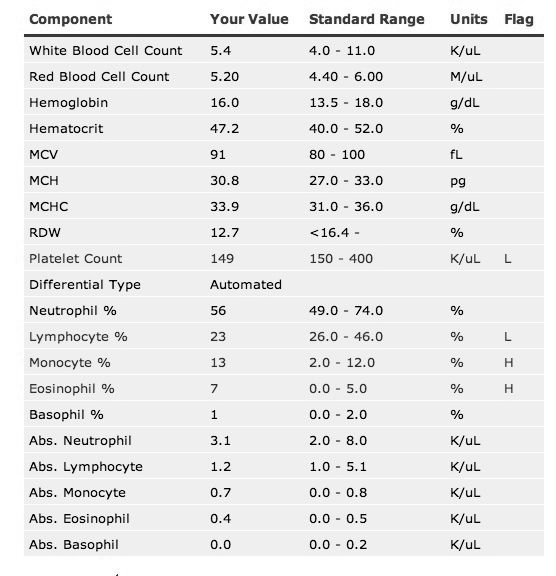

In [9]:
display(images[5]['image'])

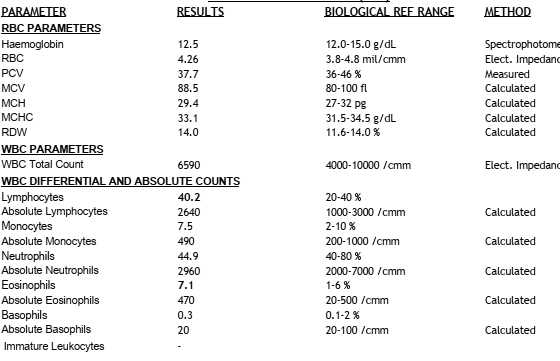

In [10]:
display(images[4]['image'])

In [11]:
print(images[4]['text'])


PARAMETER RESULTS ‘BIOLOGICAL REF RANGE == METHOD

RBC PARAMETERS

Haemoalobin 125 12.045.0 g/d. ‘Spectrophotom:
RBC 426 3.8-4.8 mil/omm Elect. Impedan
PCV 37.7 36-46 % Measured

MCV 385 80-1001 Calculated
MICH 29.4 7-328 Calculated
MCHC 33 315-345 g/dL Calculated
ROW 140 1161405 Calculated
WBC PARAMETERS

WBC Total Count 6590 4000-10000 femm Elect. Impedan
WBC DIFFERENTIAL AND ABSOLUTE COUNTS

Lymphocytes 40.2 20-40%

Absolute Lymphocytes 2640 1000-3000 /emm Calculated
Monocytes 75 240%

Absolute Monocytes 490 200-1000 femm calculated
Neutrophils 49 40-80%

Absolute Neutrophils 2960 2000-7000 femm Calculated
Eosinophils ral 16%

Absolute Eosinophils 410 20-500 femm calculated
Basophils 03 012%

Absolute Basophils 20 20-100 femm Calculated
Immature Leukocytes -



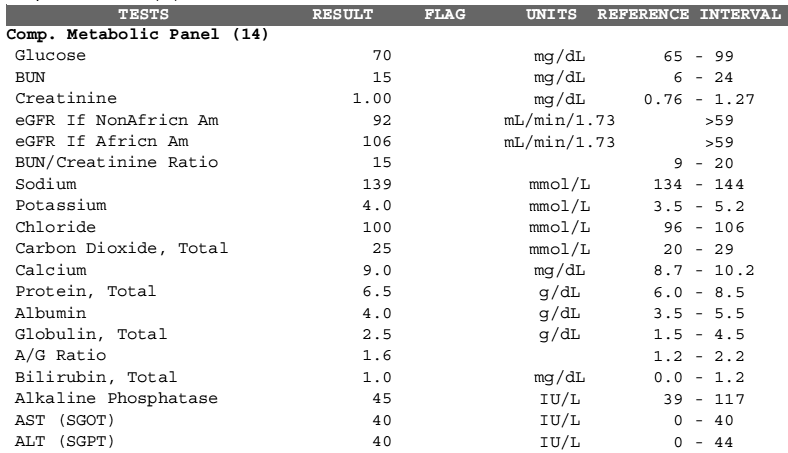

In [12]:
display(images[1]['image'])

In [13]:
print(images[1]['text'])


Comp. Metabolic Panel (14)

Glucose 70 mg/dL 65 - 99
BUN 15 mg/dL 6 - 24
Creatinine 1.00 mg/dL 0.76 - 1.27
eGFR If NonAfricn Am 92 mL/min/1.73 >59
eGFR If Africn Am 106 mL/min/1.73 >59
BUN/Creatinine Ratio 15 9 - 20
Sodium 139 mmol/L 134 - 144
Potassium 4.0 mmol/L 3.5 - 5.2
Chloride 100 mmol/L 96 - 106
Carbon Dioxide, Total 25 mmol/L 20 - 29
Calcium 9.0 mg/dL 8.7 - 10.2
Protein, Total 6.5 g/dL 6.0 - 8.5
Albumin 4.0 g/dh 3.5 - 5.5
Globulin, Total 2.5 g/dh 1.5 - 4.5
A/G Ratio 1.6 1.2 - 2.2
Bilirubin, Total 1.0 mg/dL 0.0 - 1.2
Alkaline Phosphatase 45 IU/L 39 - 117
AST (SGOT) 40 IU/L 0 - 40
ALT (SGPT) 40 IU/L 0 - 44



# Using Python Regex to clean data

In [14]:
import re

In [15]:
# Updated regex pattern to allow spaces in words
pattern = re.compile(r'([a-zA-Z\s]+)\s+([0-9]+(?:\.[0-9]+)?)')

for i in range(0,len(images)):
    
    # Find all matches in the data
    matches = pattern.findall(images[i]['text'])
    dict1={}
    # Print the result
    for match in matches:
        key = match[0].strip()
        if key not in dict1:
            dict1[key] = match[1]  # Initialize an empty list for the key if it doesn't exist
  
        
    images[i]['text']=dict1    
 

In [16]:
print(images[i]['text'])

{'AWA': '13.556', 'We eee': '5', 'rust s': '172', 'amaitcom': '4', 'WAL': '13.5', 'Pe': '11', 'Cmm\npacked Cell Volume': '244', 'WBC Count': '22', 'C': '000', 'a\nNeutrophil': '257', 'Eosinophil': '202', 'Monocyte': '103', 'emm': '1.5'}


In [17]:
print(images[1]['text'])


{'Glucose': '70', 'dL': '65', 'BUN': '15', 'Creatinine': '1.00', 'eGFR If NonAfricn Am': '92', 'eGFR If Africn Am': '106', 'Creatinine Ratio': '15', 'Sodium': '139', 'L': '134', 'Potassium': '4.0', 'Chloride': '100', 'Total': '25', 'Calcium': '9.0', 'Albumin': '4.0', 'dh': '3.5', 'G Ratio': '1.6', 'Alkaline Phosphatase': '45'}


## Creating Columns of Dataframe

In [18]:
df_columns=['Hemoglobin (HB)','Packed Cell Volume','RBC Count','MCV','MCH','MCHC','Total Leukocyte Count','Platelet Count','Neutrophils','Lymphocytes','Monocytes','Eosinophils','Basophils','AST (SGOT)','ALT (SGPT)','Alkaline Phosphatase','Bilirubin Total','Total Protein','Albumin','A : G Ratio','Urea','Creatinine','Uric Acid','Calcium','Phosphorus','Alkaline Phosphatase (ALP)','Sodium','Potassium','Chloride','Iron']

In [19]:
df= pd.DataFrame(columns=df_columns)

In [20]:
df

,Hemoglobin (HB),Packed Cell Volume,RBC Count,MCV,MCH,MCHC,Total Leukocyte Count,Platelet Count,Neutrophils,Lymphocytes,...,Urea,Creatinine,Uric Acid,Calcium,Phosphorus,Alkaline Phosphatase (ALP),Sodium,Potassium,Chloride,Iron


In [21]:
for i in images[0:2]:
    print(i['text'])

{'Glucose': '70', 'dL': '65', 'BUN': '15', 'Creatinine': '1.00', 'eGFR If NonAfricn Am': '92', 'eGFR If Africn Am': '106', 'Creatinine Ratio': '15', 'Sodium': '139', 'L': '134', 'Potassium': '4.0', 'Chloride': '100', 'Total': '25', 'Calcium': '9.0', 'Albumin': '4.0', 'dh': '3.5', 'G Ratio': '1.6', 'Alkaline Phosphatase': '45'}
{'Glucose': '70', 'dL': '65', 'BUN': '15', 'Creatinine': '1.00', 'eGFR If NonAfricn Am': '92', 'eGFR If Africn Am': '106', 'Creatinine Ratio': '15', 'Sodium': '139', 'L': '134', 'Potassium': '4.0', 'Chloride': '100', 'Total': '25', 'Calcium': '9.0', 'Albumin': '4.0', 'dh': '3.5', 'G Ratio': '1.6', 'Alkaline Phosphatase': '45'}


In [22]:
for i in images:
    if type(i['text'])==str:
        print(images.index(i))

In [23]:
len(images)

57

## Function to check if two strings are close match

In [24]:
from nltk.metrics import edit_distance
from nltk.tokenize import word_tokenize

def is_close(string1, string2, threshold=3):
    words1 = set(word_tokenize(string1.lower()))
    words2 = set(word_tokenize(string2.lower()))

    common_words = words1.intersection(words2)
    distance = edit_distance(string1.lower(), string2.lower())

    return distance <= threshold or common_words

## Creating a dataframe

In [25]:

# Iterate through each dictionary in list1
count=0
for img in images:
    # Iterate through each key-value pair in the dictionary
    for key, value in img['text'].items():
        # Check if even a part of the key is present in df_columns
        matching_columns = [col for col in df_columns if is_close(col.lower(),key.lower())]
        
        # If there's a match, add the key's value to the corresponding column(s)
        for col in matching_columns:
            df.at[count, col] = value  # Assuming you want to add values to the first row of the DataFrame
    count +=1        

# Print the resulting DataFrame
print(df)

   Hemoglobin (HB) Packed Cell Volume RBC Count     MCV     MCH  MCHC  \
0              NaN                NaN       NaN     3.5     3.5   3.5   
1              NaN                NaN       NaN     3.5     3.5   3.5   
2             15.7                NaN      0.07       2       2  14.2   
3              NaN                NaN      5.58    23.0    23.0  28.8   
4              NaN                NaN      6590     385     426    33   
5             16.0               5.20       149    12.7    12.7  33.9   
6              NaN                NaN    369000  150000  150000    28   
8             14.6                NaN       151    32.5    32.5  33.5   
9              NaN                NaN       NaN     0.1     0.1  26.6   
10             NaN                NaN       NaN       0       0     0   
11             NaN                NaN       NaN       0       0     0   
12              13                NaN       150    33.6    33.6    30   
13              13                NaN       150    

In [26]:
df.head()

,Hemoglobin (HB),Packed Cell Volume,RBC Count,MCV,MCH,MCHC,Total Leukocyte Count,Platelet Count,Neutrophils,Lymphocytes,...,Urea,Creatinine,Uric Acid,Calcium,Phosphorus,Alkaline Phosphatase (ALP),Sodium,Potassium,Chloride,Iron
0,NaN,NaN,NaN,3.5,3.5,3.5,25,NaN,NaN,NaN,...,NaN,15,NaN,9.0,NaN,45,139,4.0,100,15
1,NaN,NaN,NaN,3.5,3.5,3.5,25,NaN,NaN,NaN,...,NaN,15,NaN,9.0,NaN,45,139,4.0,100,15
2,15.7,NaN,0.07,2,2,14.2,0.07,0.07,58.1,27.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
3,NaN,NaN,5.58,23.0,23.0,28.8,NaN,NaN,2.05,NaN,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
4,NaN,NaN,6590,385,426,33,6590,6590,2960,2640,...,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,426


In [27]:
df.tail()

,Hemoglobin (HB),Packed Cell Volume,RBC Count,MCV,MCH,MCHC,Total Leukocyte Count,Platelet Count,Neutrophils,Lymphocytes,...,Urea,Creatinine,Uric Acid,Calcium,Phosphorus,Alkaline Phosphatase (ALP),Sodium,Potassium,Chloride,Iron
52,NaN,NaN,NaN,10.5,10.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5
53,NaN,NaN,4.6,24,24,338,NaN,NaN,42,2.7,...,3.6,NaN,NaN,NaN,NaN,NaN,143,4.3,NaN,3.6
54,NaN,NaN,NaN,31,31,25,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
55,399,399,399,276,276,NaN,3489,399,NaN,NaN,...,366,366,NaN,NaN,NaN,NaN,366,366,NaN,NaN
56,NaN,244,22,1.5,1.5,000,22,22,257,NaN,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory data Analysis

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 56
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hemoglobin (HB)             14 non-null     object
 1   Packed Cell Volume          7 non-null      object
 2   RBC Count                   31 non-null     object
 3   MCV                         46 non-null     object
 4   MCH                         46 non-null     object
 5   MCHC                        36 non-null     object
 6   Total Leukocyte Count       23 non-null     object
 7   Platelet Count              21 non-null     object
 8   Neutrophils                 17 non-null     object
 9   Lymphocytes                 14 non-null     object
 10  Monocytes                   18 non-null     object
 11  Eosinophils                 13 non-null     object
 12  Basophils                   11 non-null     object
 13  AST (SGOT)                  0 non-null      object
 

In [36]:
df.describe()

,Hemoglobin (HB),Packed Cell Volume,RBC Count,MCV,MCH,MCHC,Total Leukocyte Count,Platelet Count,Neutrophils,Lymphocytes,...,Urea,Creatinine,Uric Acid,Calcium,Phosphorus,Alkaline Phosphatase (ALP),Sodium,Potassium,Chloride,Iron
count,14,7,31,46,46,36,23,21,17,14,...,36,6,1,4,0,4,9,6,3,31
unique,11,7,25,33,33,28,18,18,14,11,...,28,5,1,3,0,3,7,5,2,23
top,13,5.20,150,2,2,30,150,150,40,20,...,4,15,301,9.0,NaN,45,139,4.0,100,2
freq,3,1,3,5,5,3,3,3,3,3,...,3,2,1,2,NaN,2,2,2,2,3


### Percentage of missing values

In [34]:
df.isnull().sum()/len(df)

Hemoglobin (HB)               0.708333
Packed Cell Volume            0.854167
RBC Count                     0.354167
MCV                           0.041667
MCH                           0.041667
MCHC                          0.250000
Total Leukocyte Count         0.520833
Platelet Count                0.562500
Neutrophils                   0.645833
Lymphocytes                   0.708333
Monocytes                     0.625000
Eosinophils                   0.729167
Basophils                     0.770833
AST (SGOT)                    1.000000
ALT (SGPT)                    1.000000
Alkaline Phosphatase          0.916667
Bilirubin Total               0.729167
Total Protein                 0.687500
Albumin                       0.958333
A : G Ratio                   0.687500
Urea                          0.250000
Creatinine                    0.875000
Uric Acid                     0.979167
Calcium                       0.916667
Phosphorus                    1.000000
Alkaline Phosphatase (ALP

## Medical Range Dictionary

In [38]:
medical_ranges = {
    'Hemoglobin (HB)': {'min': 12.0, 'max': 16.0, 'unit': 'g/dL'},
    'Packed Cell Volume': {'min': 38, 'max': 52, 'unit': '%'},
    'RBC Count': {'min': 4.5, 'max': 5.5, 'unit': 'million cells/mcL'},
    'MCV': {'min': 80, 'max': 100, 'unit': 'fL'},
    'MCH': {'min': 27, 'max': 33, 'unit': 'pg'},
    'MCHC': {'min': 32, 'max': 36, 'unit': 'g/dL'},
    'Total Leukocyte Count': {'min': 4000, 'max': 11000, 'unit': 'cells/mcL'},
    'Platelet Count': {'min': 150000, 'max': 450000, 'unit': 'cells/mcL'},
    'Neutrophils': {'min': 40, 'max': 75, 'unit': '%'},
    'Lymphocytes': {'min': 20, 'max': 40, 'unit': '%'},
    'Monocytes': {'min': 2, 'max': 10, 'unit': '%'},
    'Eosinophils': {'min': 1, 'max': 6, 'unit': '%'},
    'Basophils': {'min': 0, 'max': 1, 'unit': '%'},
    'AST (SGOT)': {'min': 8, 'max': 48, 'unit': 'U/L'},
    'ALT (SGPT)': {'min': 7, 'max': 56, 'unit': 'U/L'},
    'Alkaline Phosphatase': {'min': 44, 'max': 147, 'unit': 'U/L'},
    'Bilirubin Total': {'min': 0.2, 'max': 1.2, 'unit': 'mg/dL'},
    'Total Protein': {'min': 6.0, 'max': 8.0, 'unit': 'g/dL'},
    'Albumin': {'min': 3.5, 'max': 5.5, 'unit': 'g/dL'},
    'A : G Ratio': {'min': 1.2, 'max': 2.2, 'unit': 'ratio'},
    'Urea': {'min': 10, 'max': 50, 'unit': 'mg/dL'},
    'Creatinine': {'min': 0.6, 'max': 1.2, 'unit': 'mg/dL'},
    'Uric Acid': {'min': 3.5, 'max': 7.2, 'unit': 'mg/dL'},
    'Calcium': {'min': 8.6, 'max': 10.2, 'unit': 'mg/dL'},
    'Phosphorus': {'min': 2.5, 'max': 4.5, 'unit': 'mg/dL'},
    'Alkaline Phosphatase (ALP)': {'min': 30, 'max': 120, 'unit': 'U/L'},
    'Sodium': {'min': 135, 'max': 145, 'unit': 'mEq/L'},
    'Potassium': {'min': 3.5, 'max': 5.0, 'unit': 'mEq/L'},
    'Chloride': {'min': 96, 'max': 106, 'unit': 'mEq/L'},
    'Iron': {'min': 60, 'max': 170, 'unit': 'mcg/dL'}
}
